<a href="https://colab.research.google.com/github/anthonypor/Sistema-Difuso/blob/main/Control_Difuso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install -U scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

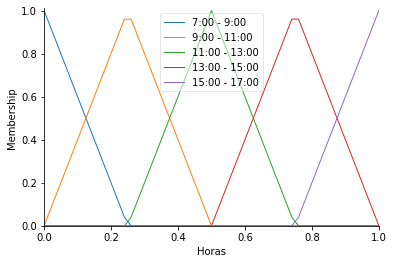

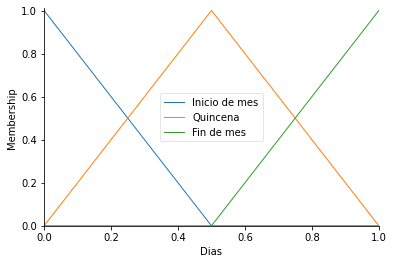

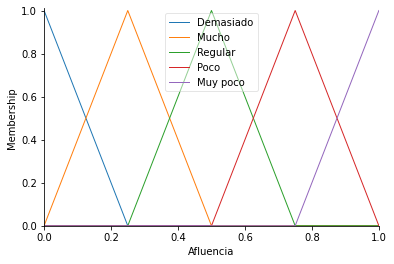

In [ ]:
universeH = np.linspace(0,1,51);
universeD = np.linspace(0,1,151);
universeA = np.linspace(0,1,201);

# Variables linguisticas 
horas = ctrl.Antecedent(universeH, 'Horas' );
dias = ctrl.Antecedent(universeD, 'Dias' );
afluencia = ctrl.Consequent(universeA, 'Afluencia' );

# Etiquetas y conjunto asociados 
namesH = ['7:00 - 9:00','9:00 - 11:00','11:00 - 13:00','13:00 - 15:00','15:00 - 17:00'];
namesD = ['Inicio de mes','Quincena','Fin de mes'];
namesA = ['Demasiado','Mucho','Regular','Poco','Muy poco'];

horas.automf(names=namesH);
dias.automf(names=namesD);
afluencia.automf(names=namesA);
horas.view();
dias.view();
afluencia.view();

In [ ]:
rule1= ctrl.Rule(antecedent=(horas['7:00 - 9:00'] & dias['Inicio de mes']), 
                 consequent=afluencia['Demasiado'], 
                 label = "rule 1")
rule2= ctrl.Rule(antecedent=(horas['7:00 - 9:00'] & dias['Quincena']), 
                 consequent=afluencia['Mucho'], 
                 label = "rule 2")
rule3= ctrl.Rule(antecedent=(horas['7:00 - 9:00'] & dias['Fin de mes']), 
                 consequent=afluencia['Demasiado'], 
                 label = "rule 3")
rule4= ctrl.Rule(antecedent=(horas['9:00 - 11:00'] & dias['Inicio de mes']), 
                 consequent=afluencia['Demasiado'] , 
                 label = "rule 4")
rule5= ctrl.Rule(antecedent=(horas['9:00 - 11:00'] & dias['Quincena']), 
                 consequent=afluencia['Mucho'], 
                 label = "rule 5")
rule6= ctrl.Rule(antecedent=(horas['9:00 - 11:00'] & dias['Fin de mes']), 
                 consequent=afluencia['Demasiado'], 
                 label = "rule 6")
rule7= ctrl.Rule(antecedent=(horas['11:00 - 13:00'] & dias['Inicio de mes']), 
                 consequent=afluencia['Regular'], 
                 label = "rule 7")
rule8= ctrl.Rule(antecedent=(horas['11:00 - 13:00'] & dias['Quincena']), 
                 consequent=afluencia['Poco'], 
                 label = "rule 8")
rule9= ctrl.Rule(antecedent=(horas['11:00 - 13:00'] & dias['Fin de mes']), 
                 consequent=afluencia['Regular'], 
                 label = "rule 9")
rule10= ctrl.Rule(antecedent=(horas['13:00 - 15:00'] & dias['Inicio de mes']), 
                 consequent=afluencia['Poco'], 
                 label = "rule 10")
rule11= ctrl.Rule(antecedent=(horas['13:00 - 15:00'] & dias['Quincena']), 
                 consequent=afluencia['Muy poco'], 
                 label = "rule 11")
rule12= ctrl.Rule(antecedent=(horas['13:00 - 15:00'] & dias['Fin de mes']), 
                 consequent=afluencia['Mucho'], 
                 label = "rule 12")
rule13= ctrl.Rule(antecedent=(horas['15:00 - 17:00'] & dias['Inicio de mes']), 
                 consequent=afluencia['Muy poco'], 
                 label = "rule 13")
rule14= ctrl.Rule(antecedent=(horas['15:00 - 17:00'] & dias['Quincena']), 
                 consequent=afluencia['Poco'], 
                 label = "rule 14")
rule15= ctrl.Rule(antecedent=(horas['15:00 - 17:00'] & dias['Fin de mes']), 
                 consequent=afluencia['Mucho'], 
                 label = "rule 15")



In [ ]:
import skfuzzy.control as ctrl
system = ctrl.ControlSystem(rules=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
sim = ctrl.ControlSystemSimulation(system);

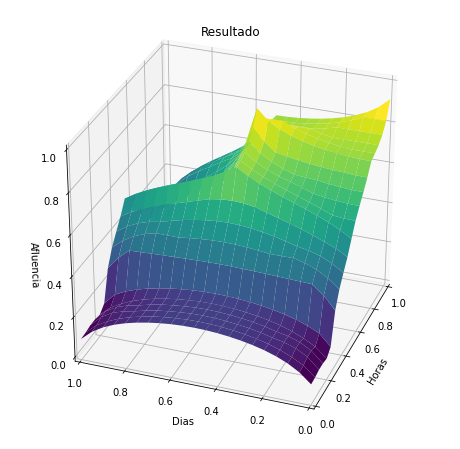

In [ ]:
upsampled = np.linspace(0, 1, 21)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

for i in range(21):
  for j in range(21):
    sim.input['Horas'] = x[i,j]
    sim.input['Dias']  = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Afluencia']

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

plt.title('Resultado')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
ax.set_xlabel('Horas')
ax.set_ylabel('Dias')
ax.set_zlabel('Afluencia')
ax.view_init(30,200)